In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading of Data**

In [4]:
location='https://raw.githubusercontent.com/h2oai/app-consumer-loan/master/data/loan.csv'
df=pd.read_csv(location)
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

In [6]:
df.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,163987.000000,163987.000000,158183.000000,1.639830e+05,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000
mean,13074.169141,13.715904,5.684353,7.191567e+04,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274
std,7993.556189,4.391940,3.610664,5.907092e+04,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733
min,500.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7000.000000,10.650000,2.000000,4.500000e+04,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000
50%,11325.000000,13.490000,6.000000,6.100000e+04,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000
75%,18000.000000,16.320000,10.000000,8.500000e+04,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000
max,35000.000000,26.060000,10.000000,7.141778e+06,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000


In [7]:
#Remove 'month' from term

df['term']=df['term'].replace({'36 months':36,'60 months':60})

In [8]:
# Finding Categorical Columns
categorical_feature_mask = df.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['home_ownership', 'purpose', 'addr_state', 'verification_status']


In [9]:
# Finding Numerical Columns
numerical_feature_mask = df.dtypes!=object

# filter categorical columns using mask and turn it into a list
numerical_cols = df.columns[numerical_feature_mask].tolist()
print(numerical_cols)

['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'revol_util', 'total_acc', 'bad_loan', 'longest_credit_length']


Handling Missing Values

In [10]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
emp_length               5804
home_ownership              0
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
dtype: int64

In [11]:
df['emp_length']=df['emp_length'].fillna(df['emp_length'].mean())
df['emp_length'].isnull().sum()

0

In [12]:
df['annual_inc']=df['annual_inc'].fillna(df['annual_inc'].mean())
df['annual_inc'].isnull().sum()

0

In [13]:
df['delinq_2yrs']=df['delinq_2yrs'].fillna(df['delinq_2yrs'].mode()[0])
df['delinq_2yrs'].isnull().sum()

0

In [14]:
df['revol_util']=df['revol_util'].fillna(df['revol_util'].median())
df['revol_util'].isnull().sum()

0

In [15]:
df['total_acc']=df['total_acc'].fillna(df['total_acc'].median())
df['total_acc'].isnull().sum()

0

In [16]:
df['longest_credit_length']=df['longest_credit_length'].fillna(df['longest_credit_length'].mode()[0])
df['longest_credit_length'].isnull().sum()

0

In [17]:
df.isnull().sum()

loan_amnt                0
term                     0
int_rate                 0
emp_length               0
home_ownership           0
annual_inc               0
purpose                  0
addr_state               0
dti                      0
delinq_2yrs              0
revol_util               0
total_acc                0
bad_loan                 0
longest_credit_length    0
verification_status      0
dtype: int64

**Setting PyCaret Environment**


In [18]:
from pycaret.classification import *

**Data Preparation**

In [20]:
dia_clf = setup(data = df,
                   target = 'bad_loan',
                   numeric_features=['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'revol_util', 'total_acc', 'longest_credit_length'],
                   categorical_features = ['home_ownership', 'purpose', 'addr_state', 'verification_status'],
                   train_size = 0.7,
                   normalize=True,
                   silent = True) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4082
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(163987, 15)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


**Compare model**
In order to compare multiple models to get an initial idea that what type of classification model would provide a better result, you can use the compare_models( ) function. Here I have used a sort = “AUC” so after training it will sort the models in decreasing order corresponding to the AUC metric. Here, you can observe that Extreme Gradient Boosting topped the list and provided the best AUC value.

In [21]:
compare_models(sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.817300,0.709600,0.056200,0.507900,0.101200,0.067200
1,Light Gradient Boosting Machine,0.817600,0.707300,0.032500,0.526500,0.061200,0.040800
2,Extreme Gradient Boosting,0.817400,0.705800,0.020400,0.531800,0.039200,0.026000
3,Gradient Boosting Classifier,0.817400,0.705600,0.025400,0.523200,0.048400,0.032000
4,Ada Boost Classifier,0.817400,0.701500,0.035300,0.517600,0.066100,0.043800
5,Logistic Regression,0.817000,0.700000,0.042800,0.501300,0.078800,0.051500
6,Linear Discriminant Analysis,0.816300,0.697200,0.054000,0.484100,0.097200,0.062800
7,Extra Trees Classifier,0.815500,0.673600,0.039600,0.452400,0.072800,0.044700
8,Random Forest Classifier,0.810000,0.636500,0.063300,0.384400,0.108600,0.060000
9,Naive Bayes,0.349900,0.616700,0.833800,0.203900,0.319100,0.039300


let's create a Light GBM Model

In [24]:
lgbm  = create_model('lightgbm')      

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8169,0.7120,0.0305,0.4961,0.0574,0.0370
1,0.8172,0.6982,0.0314,0.5116,0.0592,0.0388
2,0.8180,0.7149,0.0338,0.5462,0.0636,0.0432
3,0.8167,0.6967,0.0286,0.4878,0.0540,0.0344
4,0.8171,0.7101,0.0305,0.5039,0.0575,0.0374
5,0.8173,0.7010,0.0362,0.5135,0.0676,0.0446
6,0.8176,0.7148,0.0352,0.5248,0.0660,0.0440
7,0.8184,0.7093,0.0295,0.5741,0.0561,0.0389
8,0.8187,0.7090,0.0390,0.5694,0.0731,0.0508
9,0.8177,0.7075,0.0304,0.5378,0.0576,0.0388


**Tuning of LGBM**

In [25]:
tuned_lightgbm = tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8149,0.7059,0.0509,0.4496,0.0915,0.0563
1,0.8161,0.6965,0.0490,0.4769,0.0889,0.0567
2,0.8169,0.7076,0.0576,0.4979,0.1032,0.0679
3,0.8177,0.6909,0.0566,0.5174,0.1021,0.0685
4,0.8146,0.7043,0.0443,0.4366,0.0804,0.0483
5,0.8164,0.6973,0.0538,0.4850,0.0968,0.0626
6,0.8157,0.7057,0.0585,0.4713,0.1041,0.0664
7,0.8204,0.7046,0.0643,0.5844,0.1158,0.0825
8,0.8170,0.7012,0.0543,0.5000,0.0979,0.0644
9,0.8157,0.7032,0.0523,0.4701,0.0942,0.0597


**Learning Curve**

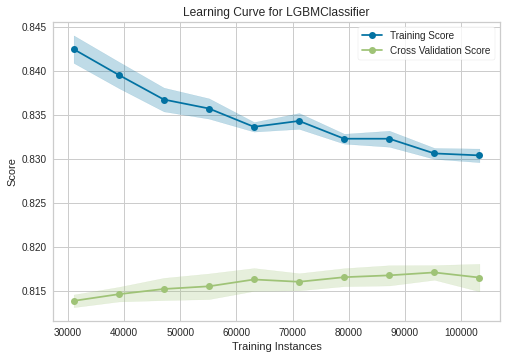

In [26]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')

**AUC Curve**

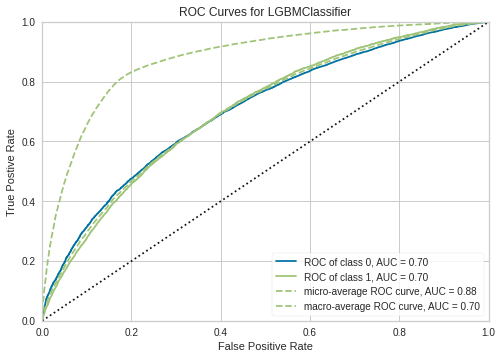

In [27]:
plot_model(estimator = tuned_lightgbm, plot = 'auc')

**Confusion Matrix**

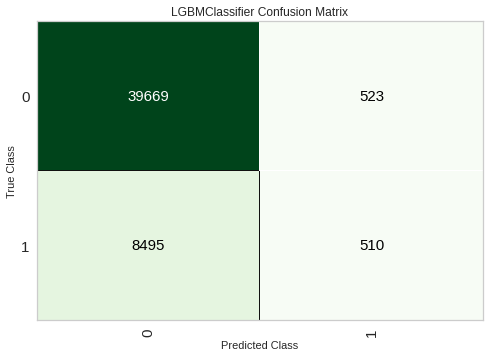

In [28]:
plot_model(estimator = tuned_lightgbm, plot = 'confusion_matrix')

**Feature Importance**

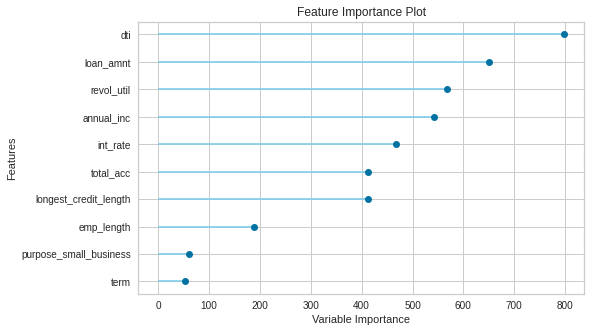

In [29]:
plot_model(estimator = tuned_lightgbm, plot = 'feature')

In [35]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Interpretation**

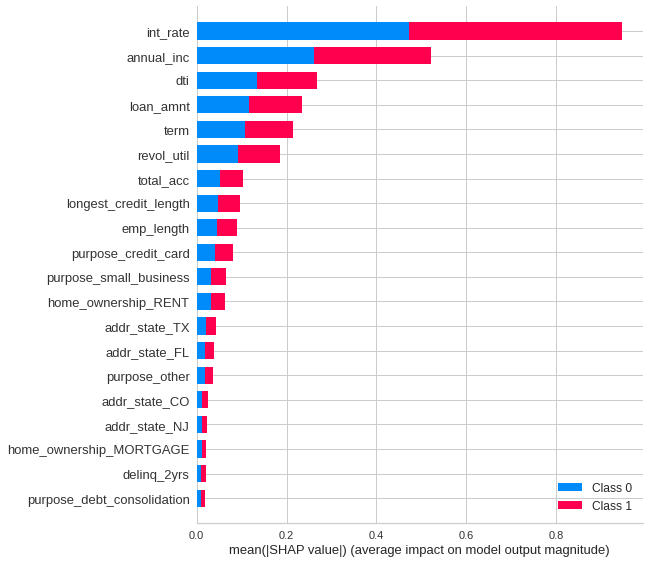

In [31]:
interpret_model(tuned_lightgbm)

**Blending of Models**

In [32]:
logr  = create_model('lr');      
xgb   = create_model('xgboost');            

#blending 3 models
blend = blend_models(estimator_list=[tuned_lightgbm,logr,xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8177,0.0,0.0271,0.5377,0.0517,0.0347
1,0.8175,0.0,0.0252,0.5300,0.0482,0.0321
2,0.8178,0.0,0.0305,0.5424,0.0577,0.0390
3,0.8178,0.0,0.0271,0.5429,0.0517,0.0349
4,0.8164,0.0,0.0257,0.4737,0.0488,0.0305
5,0.8171,0.0,0.0267,0.5045,0.0506,0.0329
6,0.8181,0.0,0.0333,0.5512,0.0628,0.0429
7,0.8190,0.0,0.0305,0.6095,0.0580,0.0413
8,0.8179,0.0,0.0319,0.5447,0.0603,0.0408
9,0.8168,0.0,0.0252,0.4953,0.0480,0.0308


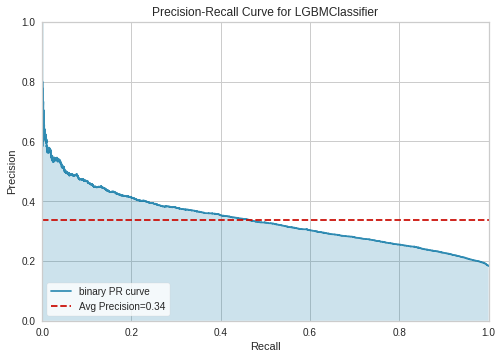

In [34]:
plot_model(tuned_lightgbm, plot = 'pr')